In [1]:
# Color Threshold , Blue screen

import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
# Read and display the image
image=cv2.imread('images/pizza_bluescreen.jpg')

# print out the type of image data and its dimension
print('This image is ',type(image),
     'with dimension :',image.shape)

This image is  <class 'numpy.ndarray'> with dimension : (514, 816, 3)


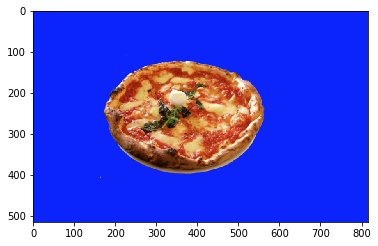

In [3]:
# make a copy of this image
image_copy=np.copy(image)

# change color to RGB from BGR
image_copy=cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)

# display the image copy
plt.imshow(image_copy)

# Define the color threshold

In [6]:
lower_blue=np.array([0,0,200])
upper_blue=np.array([50,50,255])

## create a mask

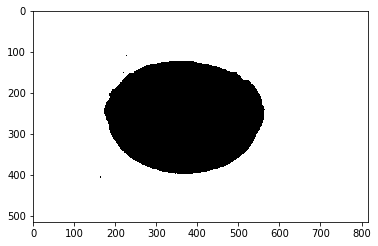

In [7]:
mask=cv2.inRange(image_copy,lower_blue,upper_blue)

# visualize the mask
plt.imshow(mask,cmap='gray')

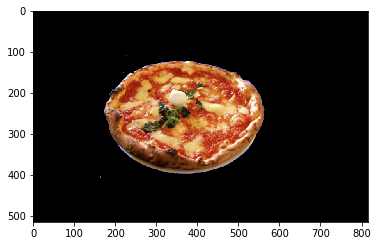

In [8]:
# mask the image to let the pizza show through
masked_image=np.copy(image_copy)
masked_image[mask !=0]=[0,0,0]
# display it
plt.imshow(masked_image)

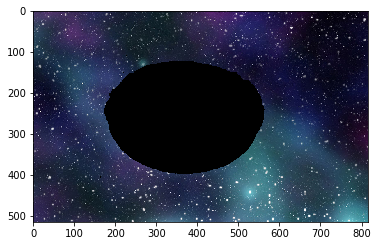

In [10]:
# Mask and add a backgroud image and conver it to RGB
background_image=cv2.imread('images/space_background.jpg')
background_image=cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)

# crop it to the right size (514x816)
crop_background=background_image[0:514,0:816]

# mask the cropped background so that the pizza area is blocked
crop_background[mask==0]=[0,0,0]
# display the background
plt.imshow(crop_background)

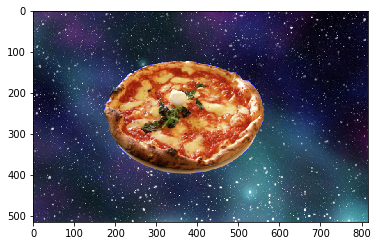

In [11]:
# Create a complete image

complete_image=masked_image+crop_background
# Display the result
plt.imshow(complete_image)